In [5]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
from data import *

In [6]:
from agent import SCAgent, SupplyChain

In [7]:
sc = SupplyChain(data=data[MAIN], policy=RLDummy)
report = sc.run(5)

In [8]:
df = pd.DataFrame.from_dict(report, orient="index").stack().to_frame()
# to break out the lists into columns
df = pd.DataFrame(df[0].values.tolist(), index=df.index)

In [9]:
#mask = ["Source","Supplier","Manufacturer","Distributor","Retailer"]
# mask = ["Source","Supplier","Manufacturer"]
mask = ["Supplier","Manufacturer","Distributor"]
#mask = ["Manufacturer","Distributor","Retailer"]
df.T[mask]

Supplier                                        Manufacturer            \
  received inventory policy lead orders forwarded     received inventory   
0        0        12    NaN  NaN     []         0            0        12   
1        0        12      3    2     []         0            0        12   
2        0        -3      0    0   [15]        12            0        -1   
3       15        12      2    2     []         3           12        11   
4        0        12      0    4     []         0            3        14   
5        0        12      0    4     []         0            0        -4   

                               Distributor                               \
  policy lead orders forwarded    received inventory policy lead orders   
0    NaN  NaN     []         0           0        12    NaN  NaN     []   
1      3    2     []         0           0        12      1    2     []   
2      2    0   [13]        12           0        -1      0    0   [13]   
3      0    2     []         1          12        -7      0    2   [18]   
4      2    4     []         0           1        -6      0    4     []   
5      1    4   [18]        14           0       -15      1    4    [9]   

             
  forwarded  
0         4  
1         4  
2        12  
3        12  
4         1  
5         0

In [10]:
sc_po = SupplyChain(data=data[MAIN], policy=PASS_ORDER)
report_po = sc_po.run()

In [11]:
df_po = pd.DataFrame.from_dict(report_po, orient="index").stack().to_frame()
df_po = pd.DataFrame(df_po[0].values.tolist(), index=df.index)

In [12]:
df_po.T

Retailer                                        Distributor            \
   received inventory policy lead orders forwarded    received inventory   
0         0        12    NaN  NaN     []         0           0        12   
1         4         1      0    2   [15]        15           0        12   
2         4        -5      0    0   [10]         5           0         2   
3        10        -3      0    2    [8]        10          10        -3   
4        12        -5      0    4   [14]        12           0        -3   
5         0       -14      0    4    [9]         0           0       -11   
6         0       -17      0    4    [3]         0          12         1   
7        11       -19      0    0   [13]        11           0       -12   
8         1       -20      0    2    [2]         1           0       -26   
9         0       -33      0    4   [13]         0          12       -23   
10       12       -32      0    1   [11]        12           1       -27   
11        1       -34      0    1    [3]         1          12       -26   
12       12       -26      0    0    [4]        12           0       -33   
13        0       -32      0    0    [6]         0           0       -52   
14        0       -43      0    1   [11]         0           0       -52   
15        0       -58      0    1   [15]         0          37       -26   
16       37       -33      0    0   [12]        37          27       -26   
17       27       -21      0    1   [15]        27          12       -14   
18       12       -13      0    1    [4]        12          12       -17   
19       12       -13      0    2   [12]        12          14        -7   
20       14        -2      0    1    [3]        14          12         5   
21        7        -8      0    1   [13]         7           0       -10   
22        5       -13      0    1   [10]         5           0       -23   
23        0       -28      0    4   [15]         0          12       -21   
24       12       -31      0    2   [15]        12           0       -21   
25        0       -34      0    2    [3]         0          15        -6   
26       15       -30      0    1   [11]        15           4       -17   
27        4       -27      0    4    [1]         4           0       -46   
28        0       -40      0    3   [13]         0           0       -46   
29        0       -50      0    4   [10]         0           0       -46   
30        0       -60      0    1   [10]         0          15       -31   
31       15       -45      0    4    [0]        15           0       -55   
32        0       -45      0    0    [0]         0           0       -55   
33        0       -53      0    3    [8]         0           0       -65   
34        0       -53      0    3    [0]         0          13       -52   
35       13       -54      0    4   [14]        13           0       -52   

                ... Supplier                           Source            \
   policy lead  ...   policy lead   orders forwarded received inventory   
0     NaN  NaN  ...      NaN  NaN       []         0        0         0   
1       0    2  ...        0    2       []         0        0         0   
2       0    0  ...        0    0     [10]        10        0         0   
3       0    2  ...        0    2       []         0        0         0   
4       0    4  ...        0    4       []         0        0         0   
5       0    4  ...        0    4       []         0        0         0   
6       0    4  ...        0    4       []         0        0         0   
7       0    0  ...        0    0     [13]        12        0         0   
8       0    2  ...        0    2       []         1        0         0   
9       0    4  ...        0    4     [15]        12        0         0   
10      0    1  ...        0    1       []         0        0         0   
11      0    1  ...        0    1     [14]         0        0         0   
12      0    0  ...        0    0  [5, 18]         0        0   

In [14]:
cost  = 0
for agent in ["Retailer",  "Distributor", "Manufacturer", "Supplier"]:
    c = df_po.T[agent]["inventory"].apply(lambda x: x if x > 0 else -2*x ).sum()
    cost += c
    print(agent, c)
print(cost)

Retailer 2001
Distributor 1840
Manufacturer 1240
Supplier 720
5801


In [16]:
sc_cha = SupplyChain(data=data[MAIN], policy=RLCha08)
report_sc_cha = sc_cha.run()
df_cha = pd.DataFrame.from_dict(report_sc_cha, orient="index").stack().to_frame()
df_cha = pd.DataFrame(df_cha[0].values.tolist(), index=df_cha.index)
cost  = 0
for agent in ["Retailer",  "Distributor", "Manufacturer", "Supplier"]:
    c = df_cha.T[agent]["inventory"].apply(lambda x: x if x > 0 else -2*x ).sum()
    cost += c
    print(agent, c)
print(cost)

Retailer 1039
Distributor 1223
Manufacturer 1099
Supplier 896
4257


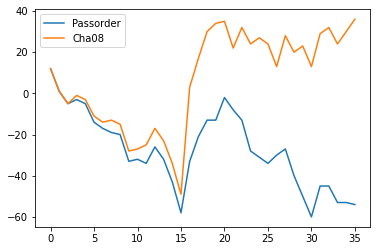

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

agent = "Retailer"
plt.plot(df_po.T[agent]["inventory"], label="Passorder")
plt.plot(df_cha.T[agent]["inventory"], label="Cha08")
plt.legend()

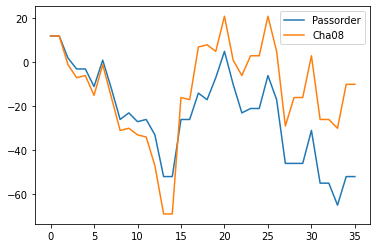

In [23]:
agent = "Distributor"
plt.plot(df_po.T[agent]["inventory"], label="Passorder")
plt.plot(df_cha.T[agent]["inventory"], label="Cha08")
plt.legend()

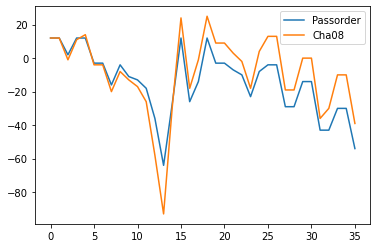

In [24]:
agent = "Manufacturer"
plt.plot(df_po.T[agent]["inventory"], label="Passorder")
plt.plot(df_cha.T[agent]["inventory"], label="Cha08")
plt.legend()

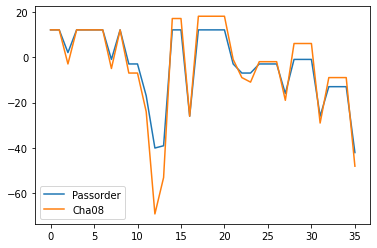

In [22]:
agent = "Supplier"
plt.plot(df_po.T[agent]["inventory"], label="Passorder")
plt.plot(df_cha.T[agent]["inventory"], label="Cha08")
plt.legend()